In [290]:
import pandas as pd
import numpy as np
import import_ipynb, math
import matplotlib.pyplot as plt
import random

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [292]:
data_file = 'dataset/knotinfo_data_complete.xls'
knot_info = pd.read_excel(data_file, skiprows=[1])

In [293]:
def convert_entry_to_float(entry):
    try:
        return np.float64(entry)
    except:
        if entry == 'Y':
            return 1
        elif entry == 'N':
            return 0
        return None

In [294]:
features1 = [
    'crossing_number', 
    'three_genus',
    'bridge_index',
    'braid_index', 
    'signature', 
    'smooth_four_genus',
    'topological_four_genus',
    'determinant',
    'alternating'
]

features2 = [
    'unknotting_number',
    'dt_rank',
    'smooth_concordance_genus',
    'ozsvath_szabo_tau_invariant'
]

features3 = [
    'braid_length',
    'crosscap_number',
    'rasmussen_invariant',
    'volume',
    'arf_invariant'
]

features4 = [
    'epsilon',
    'width',
    'double_slice_genus',
    'arf_invariant'
]

features2.extend(features1)
features3.extend(features2)
features4.extend(features3)

In [295]:
# features1 has 2971 rows
# features2 has 2152 rows
# features3 has 0661 rows
# features4 has 0652 rows

knot_info[features3].applymap(convert_entry_to_int).dropna()

,braid_length,crosscap_number,rasmussen_invariant,volume,arf_invariant,unknotting_number,dt_rank,smooth_concordance_genus,ozsvath_szabo_tau_invariant,crossing_number,three_genus,bridge_index,braid_index,signature,smooth_four_genus,topological_four_genus,determinant,alternating
1,3.0,1.0,2.0,0.000000,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,-2.0,1.0,1.0,3.0,1
2,4.0,2.0,0.0,2.029883,1.0,1.0,3.0,1.0,0.0,4.0,1.0,2.0,3.0,0.0,1.0,1.0,5.0,1
3,5.0,1.0,4.0,0.000000,1.0,2.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,-4.0,2.0,2.0,5.0,1
4,6.0,2.0,2.0,2.828122,0.0,1.0,4.0,1.0,1.0,5.0,1.0,2.0,3.0,-2.0,1.0,1.0,7.0,1
5,7.0,2.0,0.0,3.163963,0.0,1.0,8.0,0.0,0.0,6.0,1.0,2.0,4.0,0.0,0.0,0.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,14.0,4.0,2.0,13.106876,0.0,2.0,779.0,2.0,1.0,11.0,2.0,3.0,5.0,-2.0,1.0,1.0,55.0,0
780,13.0,4.0,4.0,13.150242,1.0,2.0,781.0,3.0,2.0,11.0,3.0,3.0,4.0,-4.0,2.0,2.0,45.0,0
786,14.0,4.0,-2.0,13.609804,0.0,2.0,787.0,2.0,-1.0,11.0,2.0,3.0,5.0,2.0,1.0,1.0,63.0,0
791,14.0,4.0,4.0,13.982077,0.0,2.0,792.0,3.0,2.0,11.0,3.0,3.0,5.0,-4.0,2.0,2.0,65.0,0


In [296]:
def predict_alternating(features, cross_val):  
    df = knot_info[features].applymap(convert_entry_to_float).dropna()

    X = df.drop('alternating', axis=1)
    Y = df['alternating']
    
    # max_iter needs to be atleast 500 for convergence 
    pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 1000))
    clf = pipe.fit(X, Y)
    scores = cross_val_score(clf, X, Y, cv = cross_val)
    
    return scores.mean() * 100

In [297]:
scores1 = [ predict_alternating(features1, i) for i in range(2, 21) ]

In [298]:
scores2 = [ predict_alternating(features2, i) for i in range(2, 21) ]

In [299]:
scores3 = [ predict_alternating(features3, i) for i in range(2, 21) ]

In [300]:
scores4 = [ predict_alternating(features4, i) for i in range(2, 21) ]

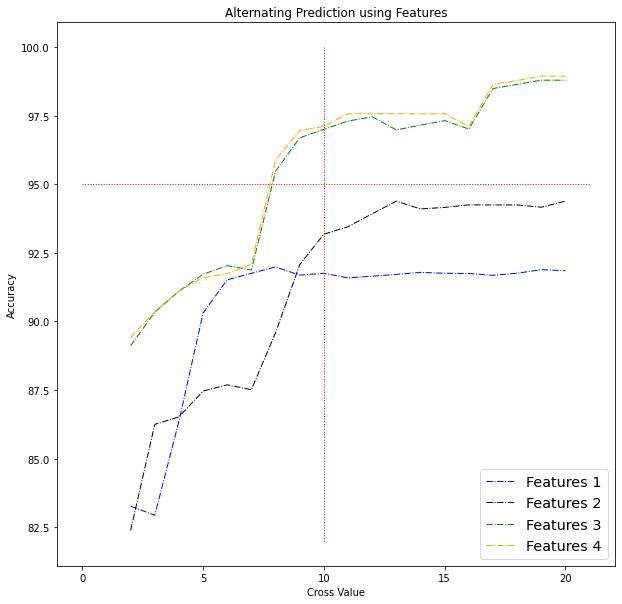

In [301]:
splits = [ i for i in range(2,21) ]

plt.plot(splits, scores1, color = 'blue', linestyle = 'dashdot', linewidth = 1, label='Features 1')
plt.plot(splits, scores2, color = 'black', linestyle = 'dashdot', linewidth = 1, label='Features 2')
plt.plot(splits, scores3, color = 'green', linestyle = 'dashdot', linewidth = 1, label='Features 3')
plt.plot(splits, scores4, color = 'orange', linestyle = 'dashdot', linewidth = 1, label='Features 4')

plt.xlabel('Cross Value')
plt.ylabel('Accuracy')
plt.title("Alternating Prediction using Features")

plt.legend(loc = 'lower right', fontsize = 'x-large')

plt.plot([0, 21], [95, 95], color = 'red', linestyle = 'dotted', linewidth = 1)
plt.plot([10, 10], [82, 100], color = 'red', linestyle = 'dotted', linewidth = 1)
plt.show()